<a href="https://colab.research.google.com/github/davidheram/linear-regression---medical-insurance-cost/blob/main/linear_regrssion_insurance_proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


El dataset contiene información demografica,

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


La edad promedio es de 39 años. La variable charges presenta una alto grado de dispersión, con valores máximos considerablemnte mayores a la  media, lo que indica valores atipicos y una distribución sesgada.

El dataset contiene 1338 registros con 7 variables. Cuensta con informacion demografica y medica como edad, sexo, índice de masa corporal, numero de hijos, habito de fumar, región y costo medico(charges), que sería el objrtivo.

In [ ]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


no se encontraron valores nulos, por lo que no fue necesrio reallizar imputaciones.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

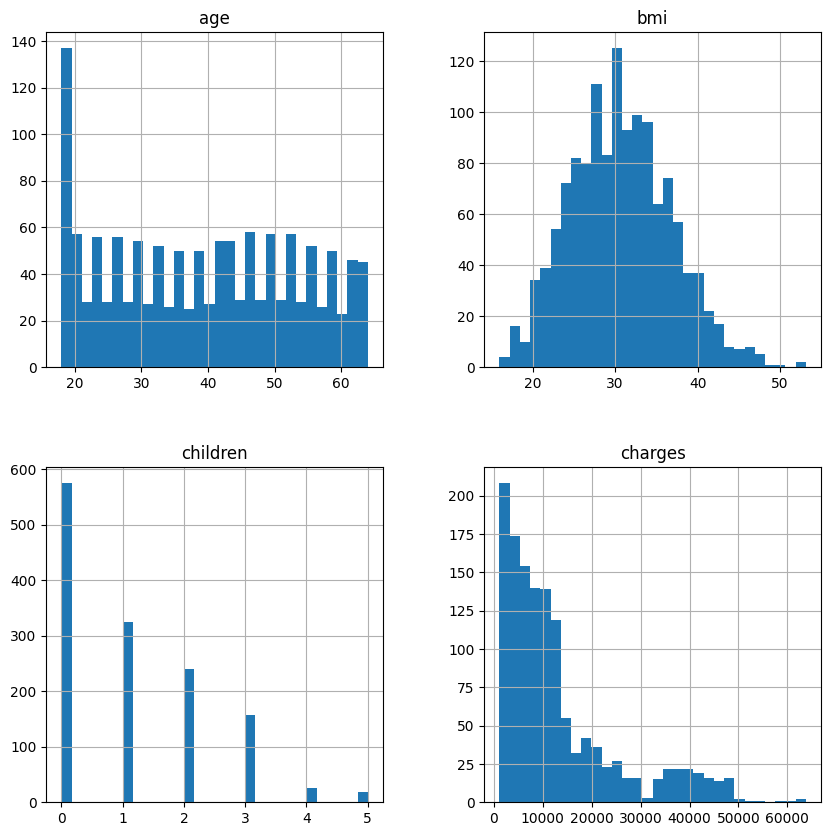

In [ ]:
#Analisis univariante

num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=30, figsize= (10,10))

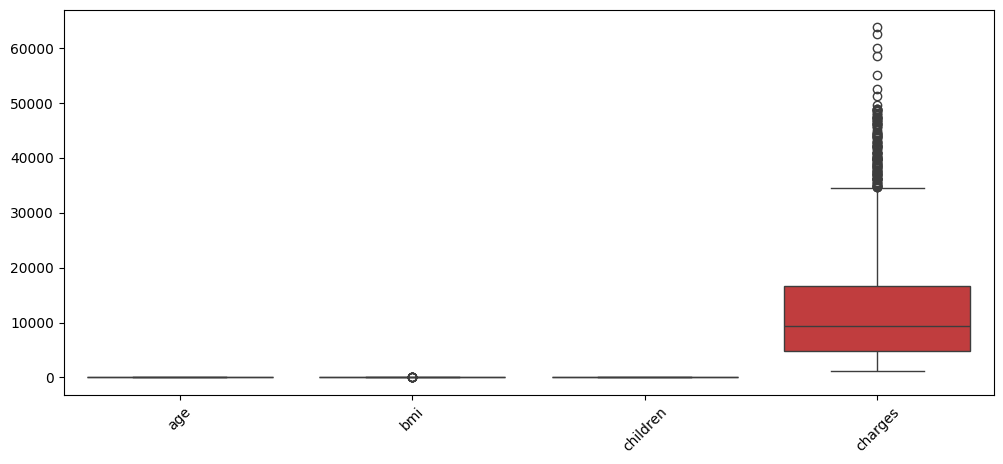

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()

La distribucion de charges presenta un sesgo positivo marcado, concentrando la mayoria de los valores en rangos bajos y algunos valores extremos elevados. La variable bmi presenta valores atípicos, mientras que children es discreta y toma valores bajos.

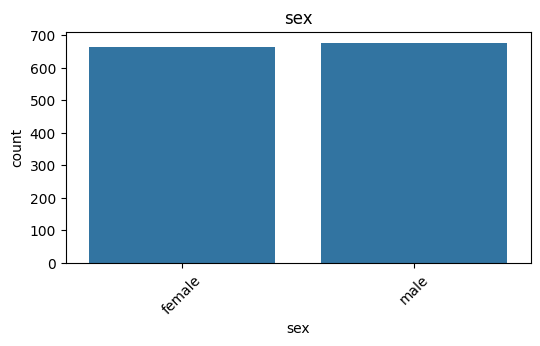

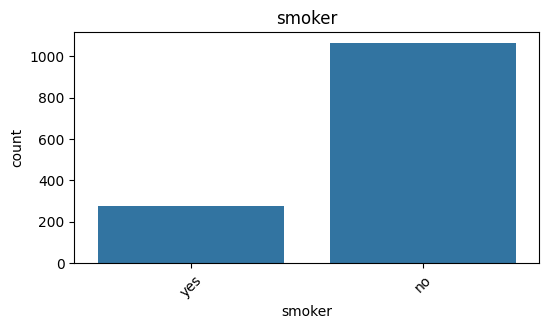

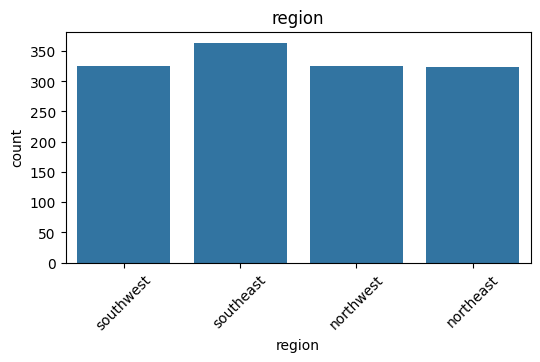

In [ ]:
#Analisis variables categoricas

cat_cols = df.select_dtypes(include = "object").columns

for col in cat_cols:
  plt.figure(figsize=(6,3))
  sns.countplot(data = df, x=col)
  plt.xticks(rotation=45)
  plt.title(col)
  plt.show()

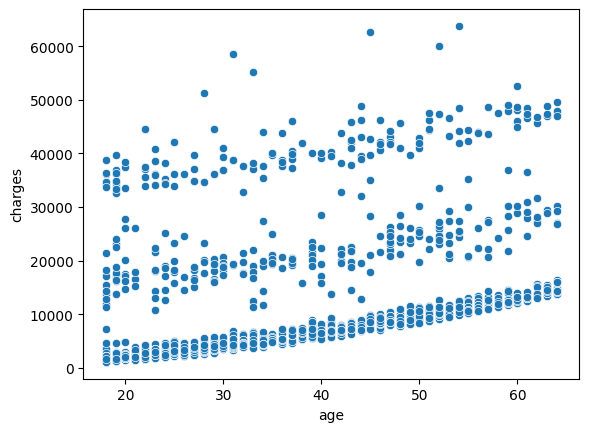

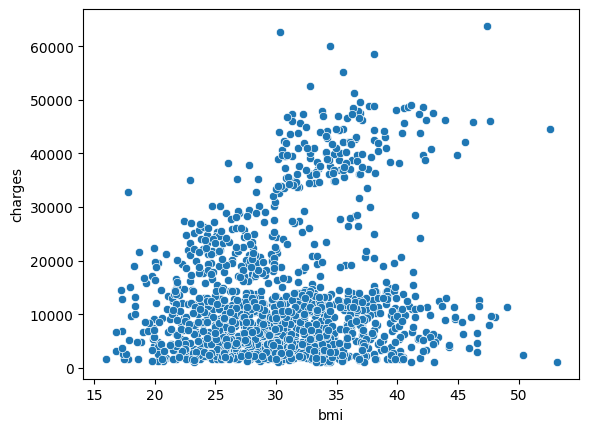

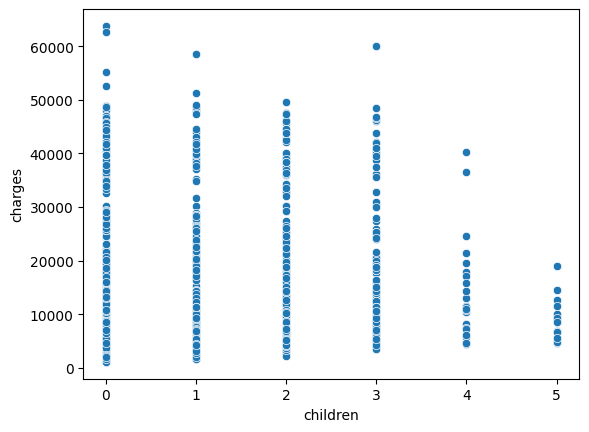

In [ ]:
#Analisis bivariante

sns.scatterplot(data = df, x="age", y="charges")
plt.show()

sns.scatterplot(data = df, x="bmi", y="charges")
plt.show()

sns.scatterplot(data = df, x= "children", y="charges")
plt.show()

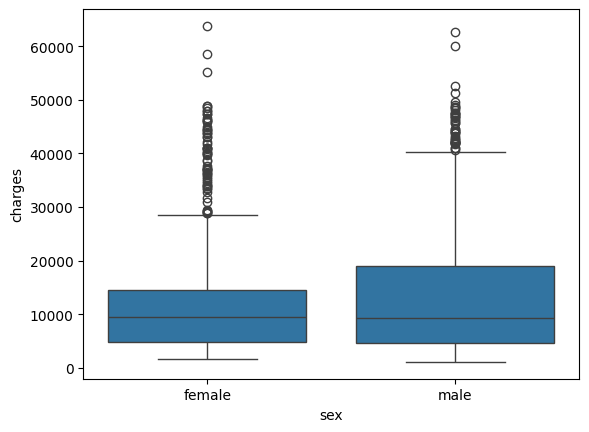

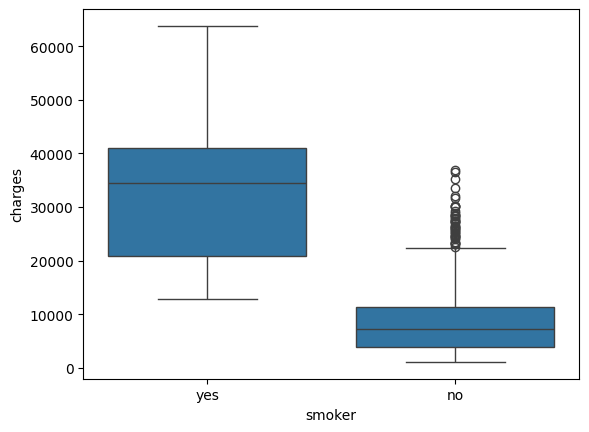

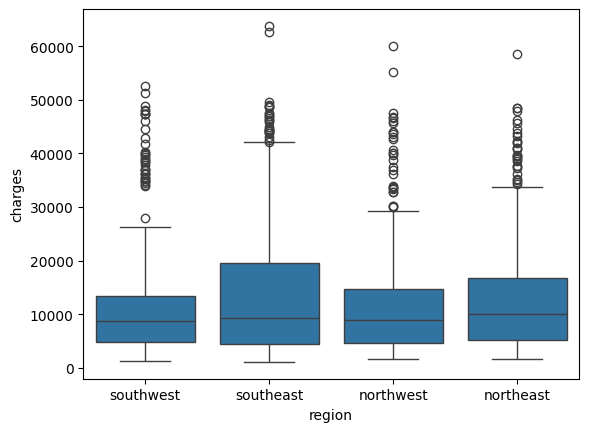

In [ ]:
sns.boxplot(data = df, x = "sex", y="charges")
plt.show()

sns.boxplot(data= df, x="smoker", y="charges")
plt.show()

sns.boxplot(data= df, x="region", y="charges")
plt.show()

Se observa una relación positiva entre la edad y los costos médicos. Los individuos fumadores presentan costos significativamente mayores que los no fumadores. La variable sex no muestra diferencias importantes en los costos, mientras que la región presenta variaciones leves.

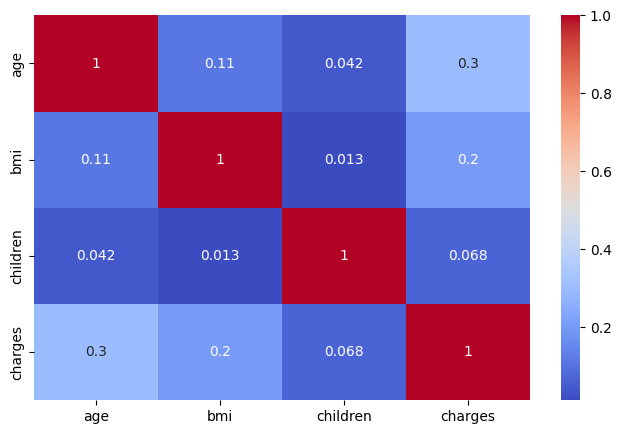

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["age","bmi","children","charges"]].corr(),annot=True, cmap = "coolwarm")

plt.show()

La variable age presenta la mayor correlación positiva con charges. No se observa multicolinealidad severa entre las variables numéricas, lo que sugiere que pueden incluirse juntas en un modelo de regresión.

<Axes: xlabel='log_charges', ylabel='Count'>

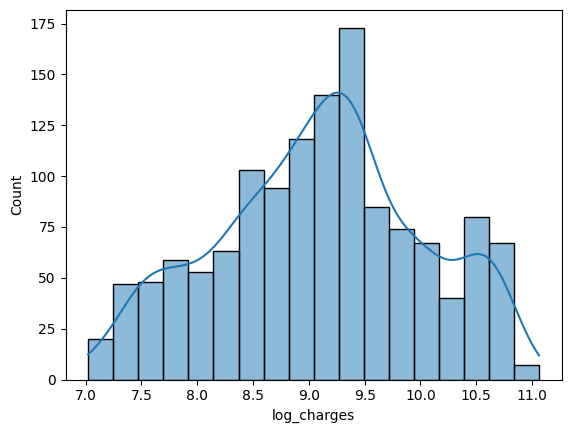

In [ ]:
df["log_charges"] = np.log1p(df["charges"])
sns.histplot(df["log_charges"], kde=True)


Debido al fuerte sesgo positivo de la variable objetivo, se aplicó una transformación logarítmica a charges con el fin de aproximar su distribución a la normalidad y mejorar el desempeño de modelos lineales.

Conclusion:

El análisis exploratorio muestra que los costos médicos están fuertemente influenciados por el hábito de fumar y la edad. La variable objetivo presenta una distribución sesgada, por lo que se recomienda aplicar transformaciones. No se detectaron problemas de multicolinealidad entre las variables numéricas. En consecuencia, el dataset es adecuado para la construcción de modelos de regresión, incorporando codificación de variables categóricas y escalado previo.

In [ ]:
X= df.drop(columns=["charges", "log_charges"])
y = df[ "log_charges"]

X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 7.046790104365405
Coeficientes (b): [ 0.03423829  0.01359904  0.09241926 -0.07432119  1.55151945 -0.05640208
 -0.13602746 -0.12252663]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.8047410791393022
RMSE: 0.17550910855320745


el modelo obtuvo un r2 de 0.89, lo que indica que el modelo esxplica un 89% de la variabilidad de la variable objetivo a partir de las variables predictorias incluidas en el modelo.
en promedio, las predicciones del modelo se desvían aproximadamente 16,070,727 unidades respecto a los valores reales

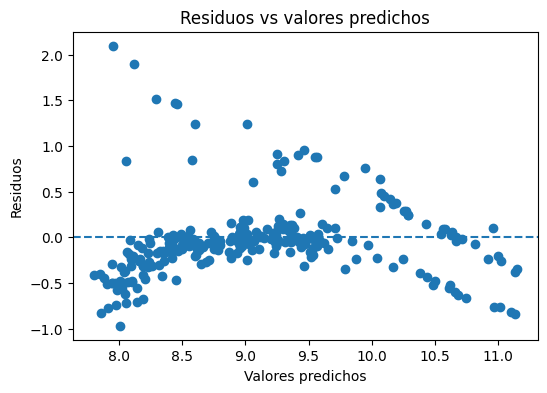

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs valores predichos")
plt.show()

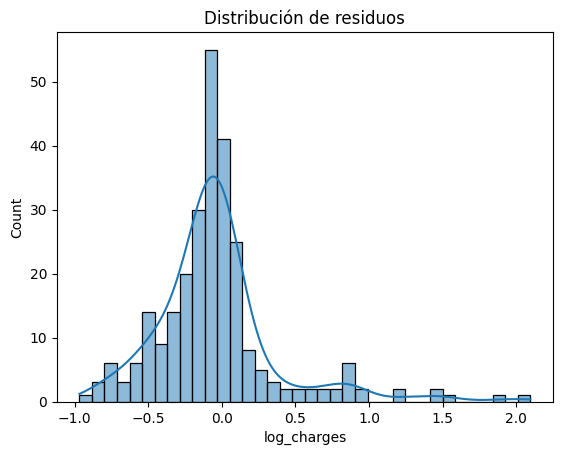

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Distribución de residuos")
plt.show()

Los gráficos de residuos y dispersión muestran que se distribuyen al rededor de cero, lo que indica que la relacion líneal es adecuada para el modelo.

In [ ]:
y_pred_np = np.asarray(y_pred, dtype=float)
y_test_np = np.asarray(y_test, dtype=float)

residuals = y_test_np - y_pred_np

In [ ]:
X_vif = X_train.copy()

X_vif = X_vif.astype(int)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif

,Variable,VIF
0,age,7.799099
1,bmi,11.109651
2,children,1.811184
3,sex_male,2.013828
4,smoker_yes,1.258822
5,region_northwest,1.873602
6,region_southeast,2.191534
7,region_southwest,1.965366



El analisis de multicolinealidad mostró un vif elevado para la variable BMI. Sin embargo, debido a su relevancia en el contexto del problema y considerando que el obejtivo del modelo es predictivo, se decidió conservarla en el modelo final.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.8047410791393022
RMSE: 0.17550910855320745


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("R² Ridge:", r2_ridge)
print("RMSE Ridge:", rmse_ridge)

R² Ridge: 0.8046354828541402
RMSE Ridge: 0.17560402411349837


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("R² Lasso:", r2_lasso)
print("RMSE Lasso:", rmse_lasso)

R² Lasso: 0.7970363835724726
RMSE Lasso: 0.18243449892537292


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 5, scoring="r2")
print("R² promedio CV Ridge:", scores.mean())




R² promedio CV Ridge: 0.7512936891031988
